<a href="https://colab.research.google.com/github/tiago-cappi/Pipeline-Clean/blob/main/Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import sqlite3

In [114]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [115]:
arquivo_excel = "/content/Pipeline (4).xlsx"
planilha = pd.read_excel(arquivo_excel, sheet_name="Dados")

In [116]:
planilha.columns = ["Código Produto", "Descrição Produto", "Tipo de Mercadoria", "Subgrupo", "Grupo", "Negócio", "Qtde Solicitada", "Saldo Estoque", "Motivo Não Venda", "Dt Encerramento", "Mês Encerramento", "Ano Encerramento", "Operação", "Processo", "Status Processo", "Dt Entrada", "Mês Entrada", "Ano Entrada", "Status da NF", "Data Aceite", "Mês Aprovado", "Ano Aprovado", "Dt Emissão", "Mês Faturado", "Ano Faturado", "Valor Orçado", "Prob.Fech.", "Consultor Interno", "Representante-pedido", "Gerente Comercial-Pedido", "Departamento", "Aplicação Mat./Serv.", "Cliente", "Nome Cliente", "Cidade", "UF", "Observações"]

In [117]:
planilha = planilha.drop(0)

In [118]:
planilha["Dt Encerramento"] = pd.to_datetime(planilha["Dt Encerramento"]).dt.normalize()
planilha["Dt Entrada"] = pd.to_datetime(planilha["Dt Entrada"]).dt.normalize()

In [119]:
conn =  sqlite3.connect("pipeline.db")
planilha.to_sql("pipeline", conn, if_exists="replace", index=False)

45108

In [120]:
cursor = conn.cursor()
cursor.execute('''
  SELECT * FROM pipeline
''')
dados = cursor.fetchall()

for dado in dados:
  print(dado)

A saída de streaming foi truncada nas últimas 5000 linhas.
('RBC-4G', 'CALIBRAÇÃO RBC 4 GASES (SENSORES: H2S, CO, O2, LEL/CH4)', 'Serviço', 'Calibração', 'Diversos Diversos', 'SSO', '0', None, None, None, None, None, 'O.S - ORDEM DE SERVICO ', '0119156', 'FATURADO', '2023-01-13 00:00:00', 'janeiro', '2023', 'FATURADA', '2023-01-13 00:00:00', 'janeiro', '2023', '2023-01-13 00:00:00', 'janeiro', '2023', '435', '100% Fechado (Fatura', 'ELIZIEL', 'SIMONE REGINA PEREIRA                   ', 'SIMONE REGINA PEREIRA                   ', 'Assistência Técnica', 'ASSISTÊNCIA TÉCNICA SSO (NÃO USAR-INATIV', '000412', 'BTX GEOLOGIA E MEIO AMBIENTE LTDA', 'SAO PAULO', 'SP', None)
('RBC-4G', 'CALIBRAÇÃO RBC 4 GASES (SENSORES: H2S, CO, O2, LEL/CH4)', 'Serviço', 'Calibração', 'Diversos Diversos', 'SSO', '0', None, None, None, None, None, 'O.S - ORDEM DE SERVICO ', '0119177', 'FATURADO', '2023-01-16 00:00:00', 'janeiro', '2023', 'FATURADA', '2023-01-16 00:00:00', 'janeiro', '2023', '2023-01-16 00:00:00',

In [141]:
!pip install dash_bootstrap_components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 13.1 MB/s eta 0:00:00


In [143]:
import dash
from dash import dcc, html, dash_table
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

In [123]:
codigos_clientes = planilha["Cliente"].unique()
df_codigos_clientes = pd.DataFrame({"Cliente": codigos_clientes})

clientes = pd.merge(df_codigos_clientes, planilha[["Cliente", "Nome Cliente"]], on="Cliente", how="left")

clientes.drop_duplicates(subset="Cliente", keep='first', inplace=True, ignore_index=True)
clientes = clientes.dropna()
clientes = clientes.sort_values(by="Nome Cliente")

clientes

,Cliente,Nome Cliente
868,022377,1000 MARCAS SAFETY BRASIL LTDA
3362,026457,13.856.599 APARECIDO JOSE CASONATO
3931,018974,2 S COMERCIO EIRELI
4928,026129,21 COMPANHIA DE ENGENHARIA DE CONSTRUCAO
3491,026249,24.272.451 ALEX TONY DA COSTA
...,...,...
1991,022218,ZF DO BRASIL LTDA.
849,022869,ZIGURATE CONSTRUCAO LTDA
5131,027850,ZIL SOLUCOES COMERCIAIS LTDA
1681,020490,ZION SOLUCOES INDUSTRIAIS EIRELI


In [124]:
def df_all_data():
  conn = sqlite3.connect("pipeline.db")
  df = pd.read_sql("SELECT * FROM pipeline", conn)
  conn.close()
  return df

In [125]:
def query_to_df(query):
  """Executes an SQL query and returns the result as a temporary DataFrame."""
  conn = sqlite3.connect("pipeline.db")
  df = pd.read_sql_query(query, conn)
  conn.close()
  return df

In [126]:
query_status_processo = query_to_df('''
  SELECT DISTINCT "Status Processo"
  FROM pipeline
  ORDER BY "Status Processo";
''')
df_status_processo = pd.DataFrame(query_status_processo)


query_prob_fechamento = query_to_df('''
  SELECT DISTINCT UPPER ("Prob.Fech.") AS prob_fechamento
  FROM pipeline
  ORDER BY "Prob.Fech.";
''')
df_prob_fechamento = pd.DataFrame(query_prob_fechamento)


query_aplicacao_mat_serv = query_to_df('''
  SELECT DISTINCT "Aplicação Mat./Serv."
  FROM pipeline
  ORDER BY "Aplicação Mat./Serv.";
''')
df_aplicacao_mat_serv = pd.DataFrame(query_aplicacao_mat_serv)
#df_aplicacao_mat_serv


query_mes_entrada = query_to_df('''
  SELECT DISTINCT "Mês Entrada"
  FROM pipeline
  ORDER BY
    CASE "Mês Entrada"
        WHEN 'janeiro' THEN 1
        WHEN 'fevereiro' THEN 2
        WHEN 'março' THEN 3
        WHEN 'abril' THEN 4
        WHEN 'maio' THEN 5
        WHEN 'junho' THEN 6
        WHEN 'julho' THEN 7
        WHEN 'agosto' THEN 8
        WHEN 'setembro' THEN 9
        WHEN 'outubro' THEN 10
        WHEN 'novembro' THEN 11
        WHEN 'dezembro' THEN 12
    END;
''')
df_mes_entrada = pd.DataFrame(query_mes_entrada)
#df_mes_entrada


query_ano_entrada = query_to_df('''
  SELECT DISTINCT "Ano Entrada"
  FROM pipeline
  ORDER BY "Ano Entrada";
''')
df_ano_entrada = pd.DataFrame(query_ano_entrada)
#df_ano_entrada


query_consultor_interno = query_to_df('''
  SELECT DISTINCT "Consultor Interno"
  FROM pipeline
  ORDER BY "Consultor Interno";
''')
df_consultor_interno = pd.DataFrame(query_consultor_interno)
#df_consultor_interno


query_representante_pedido = query_to_df('''
  SELECT DISTINCT "Representante-pedido"
  FROM pipeline
  ORDER BY "Representante-pedido";
''')
df_representante_pedido = pd.DataFrame(query_representante_pedido)
df_representante_pedido = df_representante_pedido.dropna()
#df_representante_pedido


query_gerente_comercial = query_to_df('''
  SELECT DISTINCT "Gerente Comercial-Pedido"
  FROM pipeline
  ORDER BY "Gerente Comercial-Pedido";
''')
df_gerente_comercial = pd.DataFrame(query_gerente_comercial)
df_gerente_comercial = df_gerente_comercial.dropna()
#df_gerente_comercial


query_uf = query_to_df('''
  SELECT DISTINCT "UF"
  FROM pipeline
  ORDER BY "UF";
''')
df_uf = pd.DataFrame(query_uf)
#df_uf


query_departamento = query_to_df('''
  SELECT DISTINCT "Departamento"
  FROM pipeline
  ORDER BY "Departamento";
''')
df_departamento = pd.DataFrame(query_departamento)
#df_departamento

df_status_processo

,Status Processo
0,- EFETIVAR -
1,APROVADO
2,CANCELADO
3,ENCERRADO
4,FATURADO
5,PENDENTE


In [132]:
def filtered_df(status_processo=None, prob_fechamento=None, consultor_interno=None, representante_pedido=None, gerente_comercial=None, aplicacao_mat_serv=None, mes_entrada=None, ano_entrada=None, uf=None, departamento=None):

  conn = sqlite3.connect("pipeline.db")  # Conectando ao banco de dados

  query =  '''
  SELECT
    "Nome Cliente",
    SUM("Valor Orçado") AS Valor_Orcado,
    SUM("Qtde Solicitada") AS Qtd_Solicitada
  FROM
    pipeline
  WHERE
    (? IS NULL OR "Status Processo" IN ({status}))
    AND (? IS NULL OR "Prob.Fech." IN ({prob_fechamento}))
    AND (? IS NULL OR "Consultor Interno" IN ({consultor_interno}))
    AND (? IS NULL OR "Representante-pedido" IN ({representante_pedido))
    AND (? IS NULL OR "Gerente Comercial-Pedido" IN ({gerente_comercial}))
    AND (? IS NULL OR "Aplicação Mat./Serv." IN ({aplicacao_mat_serv}))
    AND (? IS NULL OR "Mês Entrada" IN ({mes_entrada}))
    AND (? IS NULL OR "Ano Entrada" IN ({ano_entrada}))
    AND (? IS NULL OR "UF" IN ({uf}))
    AND (? IS NULL OR "Departamento" IN ({departamento}))
  GROUP BY
    "Nome Cliente";
'''

  query_probabilidades_venda =  '''
  SELECT
    UPPER("Prob.Fech.") AS Prob_Fechamento,
    SUM("Valor Orçado") AS Valor_Orcado
  FROM
    pipeline
  WHERE
    (? IS NULL OR "Status Processo" IN ({status}))
    AND (? IS NULL OR "Prob.Fech." IN ({prob_fechamento}))
    AND (? IS NULL OR "Consultor Interno" IN ({consultor_interno}))
    AND (? IS NULL OR "Representante-pedido" IN ({representante_pedido))
    AND (? IS NULL OR "Gerente Comercial-Pedido" IN ({gerente_comercial}))
    AND (? IS NULL OR "Aplicação Mat./Serv." IN ({aplicacao_mat_serv}))
    AND (? IS NULL OR "Mês Entrada" IN ({mes_entrada}))
    AND (? IS NULL OR "Ano Entrada" IN ({ano_entrada}))
    AND (? IS NULL OR "UF" IN ({uf}))
    AND (? IS NULL OR "Departamento" IN ({departamento}))
  GROUP BY
    UPPER("Prob.Fech.")
  ORDER BY
    Prob_Fechamento;
'''



  # Tratar a lista de gerentes
  if status_processo is None:
    status_placeholder = "?"
    status_params = [None]
  else:
    status_placeholder = ", ".join(["?"] * len(status_processo))
    status_params = status_processo
    status_processo = "True"

  print(status_params)
  print(status_placeholder)
  print(status_processo)
  print("-------------------------------------------------------")


  # Tratar a lista de gerentes
  if gerente_comercial is None:
    gerentes_placeholder = "?"
    gerentes_params = [None]
  else:
    gerentes_placeholder = ", ".join(["?"] * len(gerente_comercial))
    gerentes_params = gerente_comercial
    gerente_comercial = "True"


  if prob_fechamento is None:
    prob_fechamento_placeholder = "?"
    prob_fechamento_params = [None]
  else:
    prob_fechamento_placeholder = ", ".join(["?"] * len(prob_fechamento))
    prob_fechamento_params = prob_fechamento
    prob_fechamento = "True"


  if consultor_interno is None:
    consultor_interno_placeholder = "?"
    consultor_interno_params = [None]
  else:
    consultor_interno_placeholder = ", ".join(["?"] * len(consultor_interno))
    consultor_interno_params = consultor_interno
    consultor_interno = "True"


  if representante_pedido is None:
    representante_pedido_placeholder = "?"
    representante_pedido_params = [None]
  else:
    representante_pedido_placeholder = ", ".join(["?"] * len(representante_pedido))
    representante_pedido_params = representante_pedido
    representante_pedido = "True"


  if aplicacao_mat_serv is None:
    aplicacao_mat_serv_placeholder = "?"
    aplicacao_mat_serv_params = [None]
  else:
    aplicacao_mat_serv_placeholder = ", ".join(["?"] * len(aplicacao_mat_serv))
    aplicacao_mat_serv_params = aplicacao_mat_serv
    aplicacao_mat_serv = "True"


  if mes_entrada is None:
    mes_entrada_placeholder = "?"
    mes_entrada_params = [None]
  else:
    mes_entrada_placeholder = ", ".join(["?"] * len(mes_entrada))
    mes_entrada_params = mes_entrada
    mes_entrada = "True"


  if ano_entrada is None:
    ano_entrada_placeholder = "?"
    ano_entrada_params = [None]
  else:
    ano_entrada_placeholder = ", ".join(["?"] * len(ano_entrada))
    ano_entrada_params = ano_entrada
    ano_entrada = "True"


  if uf is None:
    uf_placeholder = "?"
    uf_params = [None]
  else:
    uf_placeholder = ", ".join(["?"] * len(uf))
    uf_params = uf
    uf = "True"


  if departamento is None:
    departamento_placeholder = "?"
    departamento_params = [None]
  else:
    departamento_placeholder = ", ".join(["?"] * len(departamento))
    departamento_params = departamento
    departamento = "True"




  query = query.format(gerente_comercial=gerentes_placeholder, status=status_placeholder, prob_fechamento=prob_fechamento_placeholder, consultor_interno=consultor_interno_placeholder,
                       representante_pedido=representante_pedido_placeholder, aplicacao_mat_serv=aplicacao_mat_serv_placeholder, mes_entrada=mes_entrada_placeholder,
                       ano_entrada=ano_entrada_placeholder, uf=uf_placeholder, departamento=departamento_placeholder)

  query_probabilidades_venda = query_probabilidades_venda.format(gerente_comercial=gerentes_placeholder, status=status_placeholder, prob_fechamento=prob_fechamento_placeholder, consultor_interno=consultor_interno_placeholder,
                       representante_pedido=representante_pedido_placeholder, aplicacao_mat_serv=aplicacao_mat_serv_placeholder, mes_entrada=mes_entrada_placeholder,
                       ano_entrada=ano_entrada_placeholder, uf=uf_placeholder, departamento=departamento_placeholder)

  print(query)
  print("-------------------------------------------------------")
  print (query_probabilidades_venda)
  print("-------------------------------------------------------")

  params = [
    status_processo, *status_params,
    prob_fechamento, *prob_fechamento_params,
    consultor_interno, *consultor_interno_params,
    representante_pedido, *representante_pedido_params,
    gerente_comercial, *gerentes_params, # Desempacota a lista de gerentes
    aplicacao_mat_serv, *aplicacao_mat_serv_params,
    mes_entrada, *mes_entrada_params,
    ano_entrada, *ano_entrada_params,
    uf, *uf_params,
    departamento, *departamento_params
  ]

  print(params)

  dataframe_final = pd.read_sql_query(query, conn, params=params)
  dataframe_probabilidades_vendas = pd.read_sql_query(query_probabilidades_venda, conn, params=params)
  conn.close()

  return dataframe_final, dataframe_probabilidades_vendas

In [134]:
import sqlite3
import pandas as pd

def filtered_df_teste(status_processo=None, prob_fechamento=None, consultor_interno=None, representante_pedido=None, gerente_comercial=None, aplicacao_mat_serv=None, mes_entrada=None, ano_entrada=None, uf=None, departamento=None):
    conn = sqlite3.connect("pipeline.db")  # Conectando ao banco de dados

    # Função para construir a cláusula WHERE de forma dinâmica
    def build_where_clause(column_name, values):
        if values is None:
            return "1=1"  # Retorna uma condição sempre verdadeira se não houver filtro
        else:
            placeholders = ", ".join(["?"] * len(values))
            return f'"{column_name}" IN ({placeholders})'

    # Construir a cláusula WHERE para cada filtro
    status_clause = build_where_clause("Status Processo", status_processo)
    prob_fechamento_clause = build_where_clause("Prob.Fech.", prob_fechamento)
    consultor_interno_clause = build_where_clause("Consultor Interno", consultor_interno)
    representante_pedido_clause = build_where_clause("Representante-pedido", representante_pedido)
    gerente_comercial_clause = build_where_clause("Gerente Comercial-Pedido", gerente_comercial)
    aplicacao_mat_serv_clause = build_where_clause("Aplicação Mat./Serv.", aplicacao_mat_serv)
    mes_entrada_clause = build_where_clause("Mês Entrada", mes_entrada)
    ano_entrada_clause = build_where_clause("Ano Entrada", ano_entrada)
    uf_clause = build_where_clause("UF", uf)
    departamento_clause = build_where_clause("Departamento", departamento)

    # Construir a query final
    query = f'''
    SELECT
        "Nome Cliente",
        SUM("Valor Orçado") AS Valor_Orcado,
        SUM("Qtde Solicitada") AS Qtd_Solicitada
    FROM
        pipeline
    WHERE
        {status_clause}
        AND {prob_fechamento_clause}
        AND {consultor_interno_clause}
        AND {representante_pedido_clause}
        AND {gerente_comercial_clause}
        AND {aplicacao_mat_serv_clause}
        AND {mes_entrada_clause}
        AND {ano_entrada_clause}
        AND {uf_clause}
        AND {departamento_clause}
    GROUP BY
        "Nome Cliente";
    '''

    query_probabilidades_venda = f'''
    SELECT
        UPPER("Prob.Fech.") AS Prob_Fechamento,
        SUM("Valor Orçado") AS Valor_Orcado
    FROM
        pipeline
    WHERE
        {status_clause}
        AND {prob_fechamento_clause}
        AND {consultor_interno_clause}
        AND {representante_pedido_clause}
        AND {gerente_comercial_clause}
        AND {aplicacao_mat_serv_clause}
        AND {mes_entrada_clause}
        AND {ano_entrada_clause}
        AND {uf_clause}
        AND {departamento_clause}
    GROUP BY
        UPPER("Prob.Fech.")
    ORDER BY
        Prob_Fechamento;
    '''

    # Preparar os parâmetros
    params = []
    if status_processo is not None:
        params.extend(status_processo)
    if prob_fechamento is not None:
        params.extend(prob_fechamento)
    if consultor_interno is not None:
        params.extend(consultor_interno)
    if representante_pedido is not None:
        params.extend(representante_pedido)
    if gerente_comercial is not None:
        params.extend(gerente_comercial)
    if aplicacao_mat_serv is not None:
        params.extend(aplicacao_mat_serv)
    if mes_entrada is not None:
        params.extend(mes_entrada)
    if ano_entrada is not None:
        params.extend(ano_entrada)
    if uf is not None:
        params.extend(uf)
    if departamento is not None:
        params.extend(departamento)

    # Executar as queries
    dataframe_final = pd.read_sql_query(query, conn, params=params)
    dataframe_probabilidades_vendas = pd.read_sql_query(query_probabilidades_venda, conn, params=params)
    conn.close()

    return dataframe_final, dataframe_probabilidades_vendas

In [178]:
# Criar a aplicação Dash com tema do Bootstrap
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
'''
-----------------------------------------------------------------------------------------------------------
'''
# Estilos personalizados
styles = {
    'backgroundColor': '#2c3e50',  # Fundo escuro
    'color': '#ffffff',  # Texto branco
    'fontFamily': 'Segoe UI, Roboto, sans-serif',  # Fonte moderna
    'padding': '10px',  # Espaçamento interno do container
}


# Layout da aplicação
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col([
            html.H1("Dashboard de Vendas", className="text-center mb-4", style={'color': '#ffffff'}),
            dbc.Card([
                dbc.CardBody([
                    html.H4("Ano Entrada", className="card-title", style={'color': '#3498db', 'fontSize': '18px'}),
                    dash_table.DataTable(
                        id='ano-entrada',
                        columns=[{"name": col, "id": col} for col in df_ano_entrada.columns],
                        data=df_ano_entrada.to_dict('records'),
                        row_selectable="multi",
                        selected_rows=[],
                        style_table={
                            'margin': 'auto',
                            'border': '1px solid #3498db',  # Borda discreta
                            'borderRadius': '5px',  # Bordas arredondadas
                            'overflow': 'hidden',  # Evita que o conteúdo ultrapasse as bordas
                        },
                        style_cell={
                            'textAlign': 'left',
                            'backgroundColor': '#34495e',  # Fundo das células
                            'color': 'white',  # Texto branco
                            'border': '1px solid #2c3e50',  # Bordas internas discretas
                            'padding': '10px',  # Espaçamento interno das células
                        },
                        style_header={
                            'backgroundColor': '#2c3e50',  # Fundo do cabeçalho
                            'fontWeight': 'bold',
                            'color': 'white',
                            'border': '1px solid #2c3e50',  # Bordas do cabeçalho
                            'padding': '5px',  # Espaçamento interno reduzido
                        },
                    ),
                ]),
            ], style={'backgroundColor': 'white',  # Fundo branco
                      'border': '1px solid #3498db',  # Borda azul
                      'borderRadius': '5px',  # Bordas arredondadas
                      'padding': '10px',  # Espaçamento interno reduzido
                      'marginBottom': '10px',}),  # Margem inferior reduzida

            dbc.Card([
                dbc.CardBody([
                    html.H4("Aplicação Mat./Serv.", className="card-title", style={'color': '#3498db', 'fontSize': '18px'}),
                    dash_table.DataTable(
                        id='aplicacao-mat-serv',
                        columns=[{"name": col, "id": col} for col in df_aplicacao_mat_serv.columns],
                        data=df_aplicacao_mat_serv.to_dict('records'),
                        row_selectable="multi",
                        selected_rows=[],
                        style_table={
                            'margin': 'auto',
                            'border': '1px solid #3498db',  # Borda discreta
                            'borderRadius': '5px',  # Bordas arredondadas
                            'overflow': 'hidden',  # Evita que o conteúdo ultrapasse as bordas
                        },
                        style_cell={
                            'textAlign': 'left',
                            'backgroundColor': '#34495e',  # Fundo das células
                            'color': 'white',  # Texto branco
                            'border': '1px solid #2c3e50',  # Bordas internas discretas
                            'padding': '10px',  # Espaçamento interno das células
                        },
                        style_header={
                            'backgroundColor': '#2c3e50',  # Fundo do cabeçalho
                            'fontWeight': 'bold',
                            'color': 'white',
                            'border': '1px solid #2c3e50',  # Bordas do cabeçalho
                            'padding': '5px',  # Espaçamento interno reduzido
                        },
                    ),
                ]),
            ], style={'backgroundColor': 'white',  # Fundo branco
                      'border': '1px solid #3498db',  # Borda azul
                      'borderRadius': '5px',  # Bordas arredondadas
                      'padding': '10px',  # Espaçamento interno reduzido
                      'marginBottom': '10px',}),  # Margem inferior reduzida

            dbc.Card([
                dbc.CardBody([
                    html.H4("Consultor Interno", className="card-title", style={'color': '#3498db', 'fontSize': '18px'}),
                    dash_table.DataTable(
                        id='consultor-interno',
                        columns=[{"name": col, "id": col} for col in df_consultor_interno.columns],
                        data=df_consultor_interno.to_dict('records'),
                        row_selectable="multi",
                        selected_rows=[],
                        style_table={
                            'margin': 'auto',
                            'border': '1px solid #3498db',  # Borda discreta
                            'borderRadius': '5px',  # Bordas arredondadas
                            'overflow': 'hidden',  # Evita que o conteúdo ultrapasse as bordas
                        },
                        style_cell={
                            'textAlign': 'left',
                            'backgroundColor': '#34495e',  # Fundo das células
                            'color': 'white',  # Texto branco
                            'border': '1px solid #2c3e50',  # Bordas internas discretas
                            'padding': '10px',  # Espaçamento interno das células
                        },
                        style_header={
                            'backgroundColor': '#2c3e50',  # Fundo do cabeçalho
                            'fontWeight': 'bold',
                            'color': 'white',
                            'border': '1px solid #2c3e50',  # Bordas do cabeçalho
                            'padding': '5px',  # Espaçamento interno reduzido
                        },
                    ),
                ]),
            ], style={'backgroundColor': 'white',  # Fundo branco
                      'border': '1px solid #3498db',  # Borda azul
                      'borderRadius': '5px',  # Bordas arredondadas
                      'padding': '10px',  # Espaçamento interno reduzido
                      'marginBottom': '10px',}),  # Margem inferior reduzida

            dbc.Card([
                dbc.CardBody([
                    html.H4("Departamento", className="card-title", style={'color': '#3498db', 'fontSize': '18px'}),
                    dash_table.DataTable(
                        id='departamento',
                        columns=[{"name": col, "id": col} for col in df_departamento.columns],
                        data=df_departamento.to_dict('records'),
                        row_selectable="multi",
                        selected_rows=[],
                        style_table={
                            'margin': 'auto',
                            'border': '1px solid #3498db',  # Borda discreta
                            'borderRadius': '5px',  # Bordas arredondadas
                            'overflow': 'hidden',  # Evita que o conteúdo ultrapasse as bordas
                        },
                        style_cell={
                            'textAlign': 'left',
                            'backgroundColor': '#34495e',  # Fundo das células
                            'color': 'white',  # Texto branco
                            'border': '1px solid #2c3e50',  # Bordas internas discretas
                            'padding': '10px',  # Espaçamento interno das células
                        },
                        style_header={
                            'backgroundColor': '#2c3e50',  # Fundo do cabeçalho
                            'fontWeight': 'bold',
                            'color': 'white',
                            'border': '1px solid #2c3e50',  # Bordas do cabeçalho
                            'padding': '5px',  # Espaçamento interno reduzido
                        },
                    ),
                ]),
            ], style={'backgroundColor': 'white',  # Fundo branco
                      'border': '1px solid #3498db',  # Borda azul
                      'borderRadius': '5px',  # Bordas arredondadas
                      'padding': '10px',  # Espaçamento interno reduzido
                      'marginBottom': '10px',}),  # Margem inferior reduzida

            dbc.Card([
                dbc.CardBody([
                    html.H4("Gerentes Comerciais", className="card-title", style={'color': '#3498db', 'fontSize': '18px'}),
                    dash_table.DataTable(
                        id='gerentes-comerciais',
                        columns=[{"name": col, "id": col} for col in df_gerente_comercial.columns],
                        data=df_gerente_comercial.to_dict('records'),
                        row_selectable="multi",
                        selected_rows=[],
                        style_table={
                            'margin': 'auto',
                            'border': '1px solid #3498db',  # Borda discreta
                            'borderRadius': '5px',  # Bordas arredondadas
                            'overflow': 'hidden',  # Evita que o conteúdo ultrapasse as bordas
                        },
                        style_cell={
                            'textAlign': 'left',
                            'backgroundColor': '#34495e',  # Fundo das células
                            'color': 'white',  # Texto branco
                            'border': '1px solid #2c3e50',  # Bordas internas discretas
                            'padding': '10px',  # Espaçamento interno das células
                        },
                        style_header={
                            'backgroundColor': '#2c3e50',  # Fundo do cabeçalho
                            'fontWeight': 'bold',
                            'color': 'white',
                            'border': '1px solid #2c3e50',  # Bordas do cabeçalho
                            'padding': '5px',  # Espaçamento interno reduzido
                        },
                    ),
                ]),
            ], style={'backgroundColor': 'white',  # Fundo branco
                      'border': '1px solid #3498db',  # Borda azul
                      'borderRadius': '5px',  # Bordas arredondadas
                      'padding': '10px',  # Espaçamento interno reduzido
                      'marginBottom': '10px',}),  # Margem inferior reduzida
        ], md=6),  # Primeira coluna de filtros

        dbc.Col([
            html.H1(""),
            dbc.Card([
                dbc.CardBody([
                    html.H4("Mês Entrada", className="card-title", style={'color': '#3498db', 'fontSize': '18px'}),
                    dash_table.DataTable(
                        id='mes-entrada',
                        columns=[{"name": col, "id": col} for col in df_mes_entrada.columns],
                        data=df_mes_entrada.to_dict('records'),
                        row_selectable="multi",
                        selected_rows=[],
                        style_table={
                            'margin': 'auto',
                            'border': '1px solid #3498db',  # Borda discreta
                            'borderRadius': '5px',  # Bordas arredondadas
                            'overflow': 'hidden',  # Evita que o conteúdo ultrapasse as bordas
                        },
                        style_cell={
                            'textAlign': 'left',
                            'backgroundColor': '#34495e',  # Fundo das células
                            'color': 'white',  # Texto branco
                            'border': '1px solid #2c3e50',  # Bordas internas discretas
                            'padding': '10px',  # Espaçamento interno das células
                        },
                        style_header={
                            'backgroundColor': '#2c3e50',  # Fundo do cabeçalho
                            'fontWeight': 'bold',
                            'color': 'white',
                            'border': '1px solid #2c3e50',  # Bordas do cabeçalho
                            'padding': '5px',  # Espaçamento interno reduzido
                        },
                    ),
                ]),
            ], style={'backgroundColor': 'white',  # Fundo branco
                      'border': '1px solid #3498db',  # Borda azul
                      'borderRadius': '5px',  # Bordas arredondadas
                      'padding': '10px',  # Espaçamento interno reduzido
                      'marginBottom': '10px',}),  # Margem inferior reduzida

            dbc.Card([
                dbc.CardBody([
                    html.H4("Prob. Fechamento", className="card-title", style={'color': '#3498db', 'fontSize': '18px'}),
                    dash_table.DataTable(
                        id='prob-fech',
                        columns=[{"name": col, "id": col} for col in df_prob_fechamento.columns],
                        data=df_prob_fechamento.to_dict('records'),
                        row_selectable="multi",
                        selected_rows=[],
                        style_table={
                            'margin': 'auto',
                            'border': '1px solid #3498db',  # Borda discreta
                            'borderRadius': '5px',  # Bordas arredondadas
                            'overflow': 'hidden',  # Evita que o conteúdo ultrapasse as bordas
                        },
                        style_cell={
                            'textAlign': 'left',
                            'backgroundColor': '#34495e',  # Fundo das células
                            'color': 'white',  # Texto branco
                            'border': '1px solid #2c3e50',  # Bordas internas discretas
                            'padding': '10px',  # Espaçamento interno das células
                        },
                        style_header={
                            'backgroundColor': '#2c3e50',  # Fundo do cabeçalho
                            'fontWeight': 'bold',
                            'color': 'white',
                            'border': '1px solid #2c3e50',  # Bordas do cabeçalho
                            'padding': '5px',  # Espaçamento interno reduzido
                        },
                    ),
                ]),
            ], style={'backgroundColor': 'white',  # Fundo branco
                      'border': '1px solid #3498db',  # Borda azul
                      'borderRadius': '5px',  # Bordas arredondadas
                      'padding': '10px',  # Espaçamento interno reduzido
                      'marginBottom': '10px',}),  # Margem inferior reduzida

            dbc.Card([
                dbc.CardBody([
                    html.H4("Representante-pedido", className="card-title", style={'color': '#3498db', 'fontSize': '18px'}),
                    dash_table.DataTable(
                        id='representante-pedido',
                        columns=[{"name": col, "id": col} for col in df_representante_pedido.columns],
                        data=df_representante_pedido.to_dict('records'),
                        row_selectable="multi",
                        selected_rows=[],
                        style_table={
                            'margin': 'auto',
                            'border': '1px solid #3498db',  # Borda discreta
                            'borderRadius': '5px',  # Bordas arredondadas
                            'overflow': 'hidden',  # Evita que o conteúdo ultrapasse as bordas
                        },
                        style_cell={
                            'textAlign': 'left',
                            'backgroundColor': '#34495e',  # Fundo das células
                            'color': 'white',  # Texto branco
                            'border': '1px solid #2c3e50',  # Bordas internas discretas
                            'padding': '10px',  # Espaçamento interno das células
                        },
                        style_header={
                            'backgroundColor': '#2c3e50',  # Fundo do cabeçalho
                            'fontWeight': 'bold',
                            'color': 'white',
                            'border': '1px solid #2c3e50',  # Bordas do cabeçalho
                            'padding': '5px',  # Espaçamento interno reduzido
                        },
                    ),
                ]),
            ], style={'backgroundColor': 'white',  # Fundo branco
                      'border': '1px solid #3498db',  # Borda azul
                      'borderRadius': '5px',  # Bordas arredondadas
                      'padding': '10px',  # Espaçamento interno reduzido
                      'marginBottom': '10px',}),  # Margem inferior reduzida

            dbc.Card([
                dbc.CardBody([
                    html.H4("Status Processo", className="card-title", style={'color': '#3498db', 'fontSize': '18px'}),
                    dash_table.DataTable(
                        id='status-processo',
                        columns=[{"name": col, "id": col} for col in df_status_processo.columns],
                        data=df_status_processo.to_dict('records'),
                        row_selectable="multi",
                        selected_rows=[],
                        style_table={
                            'margin': 'auto',
                            'border': '1px solid #3498db',  # Borda discreta
                            'borderRadius': '5px',  # Bordas arredondadas
                            'overflow': 'hidden',  # Evita que o conteúdo ultrapasse as bordas
                        },
                        style_cell={
                            'textAlign': 'left',
                            'backgroundColor': '#34495e',  # Fundo das células
                            'color': 'white',  # Texto branco
                            'border': '1px solid #2c3e50',  # Bordas internas discretas
                            'padding': '10px',  # Espaçamento interno das células
                        },
                        style_header={
                            'backgroundColor': '#2c3e50',  # Fundo do cabeçalho
                            'fontWeight': 'bold',
                            'color': 'white',
                            'border': '1px solid #2c3e50',  # Bordas do cabeçalho
                            'padding': '5px',  # Espaçamento interno reduzido
                        },
                    ),
                ]),
            ], style={'backgroundColor': 'white',  # Fundo branco
                      'border': '1px solid #3498db',  # Borda azul
                      'borderRadius': '5px',  # Bordas arredondadas
                      'padding': '10px',  # Espaçamento interno reduzido
                      'marginBottom': '10px',}),  # Margem inferior reduzida

            dbc.Card([
                dbc.CardBody([
                    html.H4("UF", className="card-title", style={'color': '#3498db', 'fontSize': '18px'}),
                    dash_table.DataTable(
                        id='uf',
                        columns=[{"name": col, "id": col} for col in df_uf.columns],
                        data=df_uf.to_dict('records'),
                        row_selectable="multi",
                        selected_rows=[],
                        style_table={
                            'margin': 'auto',
                            'border': '1px solid #3498db',  # Borda discreta
                            'borderRadius': '5px',  # Bordas arredondadas
                            'overflow': 'hidden',  # Evita que o conteúdo ultrapasse as bordas
                        },
                        style_cell={
                            'textAlign': 'left',
                            'backgroundColor': '#34495e',  # Fundo das células
                            'color': 'white',  # Texto branco
                            'border': '1px solid #2c3e50',  # Bordas internas discretas
                            'padding': '10px',  # Espaçamento interno das células
                        },
                        style_header={
                            'backgroundColor': '#2c3e50',  # Fundo do cabeçalho
                            'fontWeight': 'bold',
                            'color': 'white',
                            'border': '1px solid #2c3e50',  # Bordas do cabeçalho
                            'padding': '5px',  # Espaçamento interno reduzido
                        },
                    ),
                ]),
            ], style={'backgroundColor': 'white',  # Fundo branco
                      'border': '1px solid #3498db',  # Borda azul
                      'borderRadius': '5px',  # Bordas arredondadas
                      'padding-top': '5px',  # Espaçamento interno reduzido
                      'marginBottom': '10px',}),  # Margem inferior reduzida
        ], md=6),  # Segunda coluna de filtros
    ]),

    dbc.Row([
        dbc.Col([
            html.H1("Clientes", className="text-center mb-4", style={'color': '#ffffff'}),
            dcc.Loading(
                id="loading-clientes",
                type="circle",
                children=[
                    dash_table.DataTable(
                        id='tabela-clientes',
                        columns=[
                            {"name": "Nome Cliente", "id": "Nome Cliente"},
                            {"name": "Valor Orçado", "id": "Valor_Orcado"},
                            {"name": "Quantidade Solicitada", "id": "Qtd_Solicitada"}
                        ],
                        data=[],
                        style_table={
                            'margin': 'auto',
                            'border': '1px solid #3498db',  # Borda discreta
                            'borderRadius': '5px',  # Bordas arredondadas
                            'overflow': 'hidden',  # Evita que o conteúdo ultrapasse as bordas
                        },
                        style_cell={
                            'textAlign': 'left',
                            'backgroundColor': '#34495e',  # Fundo das células
                            'color': 'white',  # Texto branco
                            'border': '1px solid #2c3e50',  # Bordas internas discretas
                            'padding': '10px',  # Espaçamento interno das células
                        },
                        style_header={
                            'backgroundColor': '#2c3e50',  # Fundo do cabeçalho
                            'fontWeight': 'bold',
                            'color': 'white',
                            'border': '1px solid #2c3e50',  # Bordas do cabeçalho
                            'padding': '5px',  # Espaçamento interno reduzido
                        },
                    ),
                ],
            ),
        ], width=12),
    ]),

    dbc.Row([
        dbc.Col([
            html.H1("Resumo das Probabilidades", className="text-center mb-4", style={'color': '#ffffff'}),
            dcc.Loading(
                id="loading-probabilidades",
                type="circle",
                children=[
                    dash_table.DataTable(
                        id='resumo-probabilidades',
                        columns=[
                            {"name": "Probabilidade de Fechamento", "id": "Prob_Fechamento"},
                            {"name": "Valor Orçado Total", "id": "Valor_Orcado"}
                        ],
                        data=[],
                        style_table={
                            'margin': 'auto',
                            'border': '1px solid #3498db',  # Borda discreta
                            'borderRadius': '5px',  # Bordas arredondadas
                            'overflow': 'hidden',  # Evita que o conteúdo ultrapasse as bordas
                        },
                        style_cell={
                            'textAlign': 'left',
                            'backgroundColor': '#34495e',  # Fundo das células
                            'color': 'white',  # Texto branco
                            'border': '1px solid #2c3e50',  # Bordas internas discretas
                            'padding': '10px',  # Espaçamento interno das células
                        },
                        style_header={
                            'backgroundColor': '#2c3e50',  # Fundo do cabeçalho
                            'fontWeight': 'bold',
                            'color': 'white',
                            'border': '1px solid #2c3e50',  # Bordas do cabeçalho
                            'padding': '5px',  # Espaçamento interno reduzido
                        },
                    ),
                ],
            ),
        ], width=12),
    ]),
], fluid=True, style=styles)


# Callback para atualizar as tabelas de resultados
@app.callback(
    [Output('tabela-clientes', 'data'),
     Output('resumo-probabilidades', 'data')],
    [Input('ano-entrada', 'selected_rows'),
     Input('ano-entrada', 'derived_virtual_data'),
     Input('aplicacao-mat-serv', 'selected_rows'),
     Input('aplicacao-mat-serv', 'derived_virtual_data'),
     Input('consultor-interno', 'selected_rows'),
     Input('consultor-interno', 'derived_virtual_data'),
     Input('departamento', 'selected_rows'),
     Input('departamento', 'derived_virtual_data'),
     Input('gerentes-comerciais', 'selected_rows'),
     Input('gerentes-comerciais', 'derived_virtual_data'),
     Input('mes-entrada', 'selected_rows'),
     Input('mes-entrada', 'derived_virtual_data'),
     Input('prob-fech', 'selected_rows'),
     Input('prob-fech', 'derived_virtual_data'),
     Input('representante-pedido', 'selected_rows'),
     Input('representante-pedido', 'derived_virtual_data'),
     Input('status-processo', 'selected_rows'),
     Input('status-processo', 'derived_virtual_data'),
     Input('uf', 'selected_rows'),
     Input('uf', 'derived_virtual_data')]
)



def atualizar_tabela_clientes(selected_rows_ano, data_ano, selected_rows_aplicacao, data_aplicacao, selected_rows_consultor, data_consultor,
                              selected_rows_departamento, data_departamento, selected_rows_gerentes, data_gerentes, selected_rows_mes, data_mes,
                              selected_rows_prob, data_prob, selected_rows_representante, data_representante, selected_rows_status, data_status,
                              selected_rows_uf, data_uf):



  # VERIFICAÇÃO DE FILTROS
  if selected_rows_ano:
      ano_selecionado = [data_ano[idx]["Ano Entrada"] for idx in selected_rows_ano]
  else:
      ano_selecionado = None

  if selected_rows_aplicacao:
      aplicacao_selecionada = [data_aplicacao[idx]["Aplicação Mat./Serv."] for idx in selected_rows_aplicacao]
  else:
      aplicacao_selecionada = None

  if selected_rows_consultor:
      consultor_selecionado = [data_consultor[idx]["Consultor Interno"] for idx in selected_rows_consultor]
  else:
      consultor_selecionado = None

  if selected_rows_departamento:
      departamento_selecionado = [data_departamento[idx]["Departamento"] for idx in selected_rows_departamento]
  else:
      departamento_selecionado = None

  if selected_rows_gerentes:
      gerentes_selecionados = [data_gerentes[idx]["Gerente Comercial-Pedido"] for idx in selected_rows_gerentes]
  else:
      gerentes_selecionados = None

  if selected_rows_mes:
      mes_selecionado = [data_mes[idx]["Mês Entrada"] for idx in selected_rows_mes]
  else:
      mes_selecionado = None

  if selected_rows_prob:
      prob_selecionado = [data_prob[idx]["Prob.Fech."] for idx in selected_rows_prob]
  else:
      prob_selecionado = None

  if selected_rows_representante:
      representante_selecionado = [data_representante[idx]["Representante-pedido"] for idx in selected_rows_representante]
  else:
      representante_selecionado = None

  if selected_rows_status:
      status_selecionados = [data_status[idx]["Status Processo"] for idx in selected_rows_status]
  else:
      status_selecionados = None

  if selected_rows_uf:
      uf_selecionado = [data_uf[idx]["UF"] for idx in selected_rows_uf]
  else:
      uf_selecionado = None



  # Chama a função filtered_df com os filtros aplicados
  dataframe_final, dataframe_probabilidades_vendas = filtered_df_teste(
      ano_entrada=ano_selecionado,
      aplicacao_mat_serv=aplicacao_selecionada,
      consultor_interno=consultor_selecionado,
      departamento=departamento_selecionado,
      gerente_comercial=gerentes_selecionados,
      mes_entrada=mes_selecionado,
      prob_fechamento=prob_selecionado,
      representante_pedido=representante_selecionado,
      status_processo=status_selecionados,
      uf=uf_selecionado
  )



  #Formatação dos números das tabelas de saída:
  dataframe_final = dataframe_final.sort_values(by="Nome Cliente")
  dataframe_final["Valor_Orcado"] = dataframe_final["Valor_Orcado"].round(2)
  dataframe_final["Valor_Orcado"] = dataframe_final["Valor_Orcado"].apply(
      lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
  )

  dataframe_probabilidades_vendas = dataframe_probabilidades_vendas.sort_values(by="Prob_Fechamento")
  dataframe_probabilidades_vendas["Valor_Orcado"] = dataframe_probabilidades_vendas["Valor_Orcado"].round(2)
  dataframe_probabilidades_vendas["Valor_Orcado"] = dataframe_probabilidades_vendas["Valor_Orcado"].apply(
    lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
  )

  #Devolução das tabelas de saída
  return dataframe_final.to_dict('records'), dataframe_probabilidades_vendas.to_dict('records')



# Rodar o servidor
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

In [139]:
#BACKUP APLICATIVO OFICIAL ---------------------------------------------------------------------------------------------------------------------

# Criar a aplicação Dash
app = dash.Dash(__name__)

dataframe_final, dataframe_probabilidades_vendas = filtered_df_teste()



# Layout da aplicação
app.layout = html.Div([

    html.H1("Ano Entrada"),
    dash_table.DataTable(
        id='ano-entrada',
        columns=[{"name": col, "id": col} for col in df_ano_entrada.columns],  # Define as colunas
        data=(df_ano_entrada.sort_values(by="Ano Entrada")).to_dict('records'),  # Define os dados
        row_selectable="multi",
        selected_rows=[],  # Linhas selecionadas
        style_table={'width': '50%', 'margin': 'auto'},  # Estilo da tabela
        style_cell={'textAlign': 'left'},  # Alinhamento do texto
    ),

    html.H1("Aplicação Mat./Serv."),
    dash_table.DataTable(
        id='aplicacao-mat-serv',
        columns=[{"name": col, "id": col} for col in df_aplicacao_mat_serv.columns],  # Define as colunas
        data=(df_aplicacao_mat_serv.sort_values(by="Aplicação Mat./Serv.")).to_dict('records'),  # Define os dados
        row_selectable="multi",
        selected_rows=[],  # Linhas selecionadas
        style_table={'width': '50%', 'margin': 'auto'},  # Estilo da tabela
        style_cell={'textAlign': 'left'},  # Alinhamento do texto
    ),

    html.H1("Consultor Interno"),
    dash_table.DataTable(
        id='consultor-interno',
        columns=[{"name": col, "id": col} for col in df_consultor_interno.columns],  # Define as colunas
        data=(df_consultor_interno.sort_values(by="Consultor Interno")).to_dict('records'),  # Define os dados
        row_selectable="multi",
        selected_rows=[],  # Linhas selecionadas
        style_table={'width': '50%', 'margin': 'auto'},  # Estilo da tabela
        style_cell={'textAlign': 'left'},  # Alinhamento do texto
    ),

    html.H1("Departamento"),
    dash_table.DataTable(
        id='departamento',
        columns=[{"name": col, "id": col} for col in df_departamento.columns],  # Define as colunas
        data=(df_departamento.sort_values(by="Departamento")).to_dict('records'),  # Define os dados
        row_selectable="multi",
        selected_rows=[],  # Linhas selecionadas
        style_table={'width': '50%', 'margin': 'auto'},  # Estilo da tabela
        style_cell={'textAlign': 'left'},  # Alinhamento do texto
    ),

    html.H1("Gerentes Comerciais"),
    dash_table.DataTable(
        id='gerentes-comerciais',
        columns=[{"name": col, "id": col} for col in df_gerente_comercial.columns],  # Define as colunas
        data=(df_gerente_comercial.sort_values(by="Gerente Comercial-Pedido")).to_dict('records'),  # Define os dados
        row_selectable="multi",
        selected_rows=[],  # Linhas selecionadas
        style_table={'width': '50%', 'margin': 'auto'},  # Estilo da tabela
        style_cell={'textAlign': 'left'},  # Alinhamento do texto
    ),

    html.H1("Mês Entrada"),
    dash_table.DataTable(
        id='mes-entrada',
        columns=[{"name": col, "id": col} for col in df_mes_entrada.columns],  # Define as colunas
        data=(df_mes_entrada.sort_values(by="Mês Entrada")).to_dict('records'),  # Define os dados
        row_selectable="multi",
        selected_rows=[],  # Linhas selecionadas
        style_table={'width': '50%', 'margin': 'auto'},  # Estilo da tabela
        style_cell={'textAlign': 'left'},  # Alinhamento do texto
    ),

    html.H1("Prob_fechamento"),
    dash_table.DataTable(
        id='prob-fech',
        columns=[{"name": col, "id": col} for col in df_prob_fechamento.columns],  # Define as colunas
        data=(df_prob_fechamento.sort_values(by="prob_fechamento")).to_dict('records'),  # Define os dados
        row_selectable="multi",
        selected_rows=[],  # Linhas selecionadas
        style_table={'width': '50%', 'margin': 'auto'},  # Estilo da tabela
        style_cell={'textAlign': 'left'},  # Alinhamento do texto
    ),

    html.H1("Representante-pedido"),
    dash_table.DataTable(
        id='representante-pedido',
        columns=[{"name": col, "id": col} for col in df_representante_pedido.columns],  # Define as colunas
        data=(df_representante_pedido.sort_values(by="Representante-pedido")).to_dict('records'),  # Define os dados
        row_selectable="multi",
        selected_rows=[],  # Linhas selecionadas
        style_table={'width': '50%', 'margin': 'auto'},  # Estilo da tabela
        style_cell={'textAlign': 'left'},  # Alinhamento do texto
    ),

    html.H1("Status Processo"),
    dash_table.DataTable(
        id='status-processo',
        columns=[{"name": col, "id": col} for col in df_status_processo.columns],  # Define as colunas
        data=(df_status_processo.sort_values(by="Status Processo")).to_dict('records'),  # Define os dados
        row_selectable="multi",
        selected_rows=[],  # Linhas selecionadas
        style_table={'width': '50%', 'margin': 'auto'},  # Estilo da tabela
        style_cell={'textAlign': 'left'},  # Alinhamento do texto
    ),

    html.H1("UF"),
    dash_table.DataTable(
        id='uf',
        columns=[{"name": col, "id": col} for col in df_uf.columns],  # Define as colunas
        data=(df_uf.sort_values(by="UF")).to_dict('records'),  # Define os dados
        row_selectable="multi",
        selected_rows=[],  # Linhas selecionadas
        style_table={'width': '50%', 'margin': 'auto'},  # Estilo da tabela
        style_cell={'textAlign': 'left'},  # Alinhamento do texto
    ),



    # Espaço para a tabela de vendas
    html.H1("Clientes"),
    dash_table.DataTable(
        id='tabela-clientes',
        columns=[{"name": col, "id": col} for col in dataframe_final.columns],
        data=[],  # Inicialmente vazia
        style_table={'width': '50%', 'margin': 'auto'},
        style_cell={'textAlign': 'left'},
    ),

    html.H1("Resumo das probabilidades"),
    dash_table.DataTable(
        id = 'resumo-probabilidades',
        columns = [{"name": col, "id": col} for col in dataframe_probabilidades_vendas.columns],
        data = [],  # Inicialmente vazia
        style_table = {'width': '50%', 'margin': 'auto'},
        style_cell = {'textAlign': 'left'},
    ),
])



@app.callback(
    Output('tabela-clientes', 'data'),
    Output('resumo-probabilidades', 'data'),

    [Input('ano-entrada', 'selected_rows'),
    Input('ano-entrada', 'derived_virtual_data'),
    Input('aplicacao-mat-serv', 'selected_rows'),
    Input('aplicacao-mat-serv', 'derived_virtual_data'),
    Input('consultor-interno', 'selected_rows'),
    Input('consultor-interno', 'derived_virtual_data'),
    Input('departamento', 'selected_rows'),
    Input('departamento', 'derived_virtual_data'),
    Input('gerentes-comerciais', 'selected_rows'),
    Input('gerentes-comerciais', 'derived_virtual_data'),
    Input('mes-entrada', 'selected_rows'),
    Input('mes-entrada', 'derived_virtual_data'),
    Input('prob-fech', 'selected_rows'),
    Input('prob-fech', 'derived_virtual_data'),
    Input('representante-pedido', 'selected_rows'),
    Input('representante-pedido', 'derived_virtual_data'),
    Input('status-processo', 'selected_rows'),
    Input('status-processo', 'derived_virtual_data'),
    Input('uf', 'selected_rows'),
    Input('uf', 'derived_virtual_data')
    ]
)



def atualizar_tabela_clientes(selected_rows_ano, data_ano, selected_rows_aplicacao, data_aplicacao, selected_rows_consultor, data_consultor,
                              selected_rows_departamento, data_departamento, selected_rows_gerentes, data_gerentes, selected_rows_mes, data_mes,
                              selected_rows_prob, data_prob, selected_rows_representante, data_representante, selected_rows_status, data_status,
                              selected_rows_uf, data_uf):



  # VERIFICAÇÃO DE FILTROS
  if selected_rows_ano:
      ano_selecionado = [data_ano[idx]["Ano Entrada"] for idx in selected_rows_ano]
  else:
      ano_selecionado = None

  if selected_rows_aplicacao:
      aplicacao_selecionada = [data_aplicacao[idx]["Aplicação Mat./Serv."] for idx in selected_rows_aplicacao]
  else:
      aplicacao_selecionada = None

  if selected_rows_consultor:
      consultor_selecionado = [data_consultor[idx]["Consultor Interno"] for idx in selected_rows_consultor]
  else:
      consultor_selecionado = None

  if selected_rows_departamento:
      departamento_selecionado = [data_departamento[idx]["Departamento"] for idx in selected_rows_departamento]
  else:
      departamento_selecionado = None

  if selected_rows_gerentes:
      gerentes_selecionados = [data_gerentes[idx]["Gerente Comercial-Pedido"] for idx in selected_rows_gerentes]
  else:
      gerentes_selecionados = None

  if selected_rows_mes:
      mes_selecionado = [data_mes[idx]["Mês Entrada"] for idx in selected_rows_mes]
  else:
      mes_selecionado = None

  if selected_rows_prob:
      prob_selecionado = [data_prob[idx]["Prob.Fech."] for idx in selected_rows_prob]
  else:
      prob_selecionado = None

  if selected_rows_representante:
      representante_selecionado = [data_representante[idx]["Representante-pedido"] for idx in selected_rows_representante]
  else:
      representante_selecionado = None

  if selected_rows_status:
      status_selecionados = [data_status[idx]["Status Processo"] for idx in selected_rows_status]
  else:
      status_selecionados = None

  if selected_rows_uf:
      uf_selecionado = [data_uf[idx]["UF"] for idx in selected_rows_uf]
  else:
      uf_selecionado = None



  # Chama a função filtered_df com os filtros aplicados
  dataframe_final, dataframe_probabilidades_vendas = filtered_df_teste(
      ano_entrada=ano_selecionado,
      aplicacao_mat_serv=aplicacao_selecionada,
      consultor_interno=consultor_selecionado,
      departamento=departamento_selecionado,
      gerente_comercial=gerentes_selecionados,
      mes_entrada=mes_selecionado,
      prob_fechamento=prob_selecionado,
      representante_pedido=representante_selecionado,
      status_processo=status_selecionados,
      uf=uf_selecionado
  )



  #Formatação dos números das tabelas de saída:
  dataframe_final = dataframe_final.sort_values(by="Nome Cliente")
  dataframe_final["Valor_Orcado"] = dataframe_final["Valor_Orcado"].round(2)
  dataframe_final["Valor_Orcado"] = dataframe_final["Valor_Orcado"].apply(
      lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
  )

  dataframe_probabilidades_vendas = dataframe_probabilidades_vendas.sort_values(by="Prob_Fechamento")
  dataframe_probabilidades_vendas["Valor_Orcado"] = dataframe_probabilidades_vendas["Valor_Orcado"].round(2)
  dataframe_probabilidades_vendas["Valor_Orcado"] = dataframe_probabilidades_vendas["Valor_Orcado"].apply(
    lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
  )

  #Devolução das tabelas de saída
  return dataframe_final.to_dict('records'), dataframe_probabilidades_vendas.to_dict('records')



# Rodar o servidor
app.run_server(mode='inline')

<IPython.core.display.Javascript object>

In [138]:
filtered_df_teste(ano_entrada=[2023])

(                                     Nome Cliente  Valor_Orcado  \
 0                  1000 MARCAS SAFETY BRASIL LTDA      3355.238   
 1     26.604.718 MARCOS VINICIUS SOUSA DOS SANTOS    191506.602   
 2                        2S ENGENHARIA LTDA - EPP      8648.592   
 3                                33 INOVACAO LTDA     35801.326   
 4          35.181.038 THIAGO PEREIRA VILELA COSTA       233.759   
 ...                                           ...           ...   
 2177                           ZERO RESIDUOS LTDA    245309.445   
 2178                   ZETTA METROLOGIA LTDA - ME       610.158   
 2179                    ZF AUTOMOTIVE BRASIL LTDA      8745.744   
 2180                   ZF AUTOMOTIVE BRASIL LTDA.     43648.120   
 2181             ZION SOLUCOES INDUSTRIAIS EIRELI     34339.201   
 
       Qtd_Solicitada  
 0                1.0  
 1               16.0  
 2                2.0  
 3                6.0  
 4                1.0  
 ...              ...  
 2177         

In [129]:
filtered_df(status_processo=["ENCERRADO", "FATURADO"])

['ENCERRADO', 'FATURADO']
?, ?
True
-------------------------------------------------------


ValueError: unexpected '{' in field name

In [22]:
def calculo_probabilidades(data_frame):

  # 1. Converter a coluna 'Prob.Fech.' para maiúsculas
  data_frame['Prob.Fech.'] = data_frame['Prob.Fech.'].str.upper()

  # 2. Agrupar pela coluna convertida e somar os valores orçados
  df_grouped = data_frame.groupby('Prob.Fech.')['Valor Orçado'].sum().reset_index()

  # 3. Ordenar os resultados pela coluna 'Prob.Fech.'
  df_grouped = df_grouped.sort_values(by='Prob.Fech.')

  # Renomear a coluna de soma para 'Total_Orcado'
  df_grouped = df_grouped.rename(columns={'Valor Orçado': 'Total_Orcado'})

  df_grouped = df_grouped.round(2)
  df_grouped["Total_Orcado"] = df_grouped["Total_Orcado"].apply(
    lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")
  )

  return df_grouped

In [24]:
df = filtered_df(gerente_comercial=['SIMONE REGINA PEREIRA'])
df

(Empty DataFrame
 Columns: [Nome Cliente, Valor_Orcado, Qtd_Solicitada]
 Index: [],
 Empty DataFrame
 Columns: [Prob_Fechamento, Valor_Orcado]
 Index: [])

In [25]:
def make_dash_graph(df):

  # Criar a aplicação Dash
  app = dash.Dash(__name__)

  # Layout da aplicação
  app.layout = html.Div([
      dash_table.DataTable(
          id='teste',
          columns=[{"name": col, "id": col} for col in df.columns],  # Define as colunas
          data= df.to_dict('records'),  # Define os dados
          style_table={'width': '50%', 'margin': 'auto'},  # Estilo da tabela
          style_cell={'textAlign': 'left'},  # Alinhamento do texto
      )
  ])

  # Rodar o servidor
  app.run_server(mode='inline')

<IPython.core.display.Javascript object>

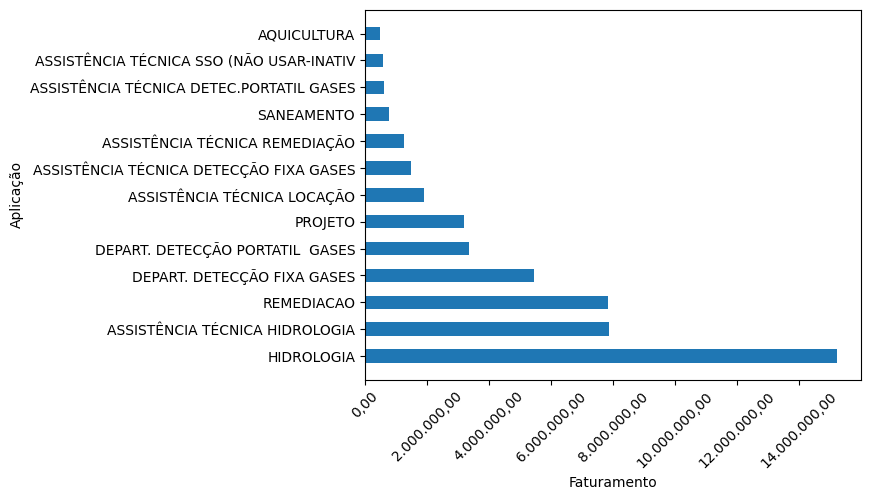

In [26]:
# prompt: faça qualquer consulta no banco de dados sqlite presente aqui ser transformada em um dataframe temporário

import matplotlib.pyplot as plt  # Importação do pyplot
from matplotlib.ticker import FuncFormatter

import pandas as pd


# Função para formatar os números do eixo X
def formatar_numero(valor, pos):
    """
    Formata o número com separador de milhar como '.' e decimal como ','.
    Exemplo: 1000.50 -> 1.000,50
    """
    return f"{valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")


df_temp = query_to_df('''
SELECT "Aplicação Mat./Serv.", SUM("Valor Orçado") AS Faturamento_2024
FROM pipeline
WHERE
    "Ano Faturado" = 2024
    AND "Ano Faturado" IS NOT NULL
GROUP BY
    "Aplicação Mat./Serv."
ORDER BY
    Faturamento_2024 DESC;
'''
)


df_temp = df_temp.round(2)
make_dash_graph(df_temp)

# Criar o gráfico usando plt.bar()
x = df_temp['Faturamento_2024']      # Valores do eixo Y (alturas das barras)
y = df_temp['Aplicação Mat./Serv.']  # Valores do eixo X (categorias)


# Criar o gráfico
plt.barh(y, x, height=0.5)  # height=0.5 aumenta o espaço entre as barras
plt.xlabel("Faturamento")  # Rótulo do eixo X
plt.ylabel("Aplicação")  # Rótulo do eixo Y
plt.xticks(rotation=45)
plt.ticklabel_format(axis='x', style='plain')

# Aplicar a formatação personalizada ao eixo X
formatter = FuncFormatter(formatar_numero)
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()  # Exibir o gráfico